In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("SampleSuperstore.csv.zip")

In [5]:
df.shape

(9994, 13)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
categorical_cols=df.select_dtypes(include=("object")).columns
print("categorical_columns:")
print(categorical_cols)

categorical_columns:
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')


In [12]:
numerical_cols=df.select_dtypes(include=('int64' , 'float64')).columns 
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [13]:
df.duplicated().sum()

np.int64(17)

In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


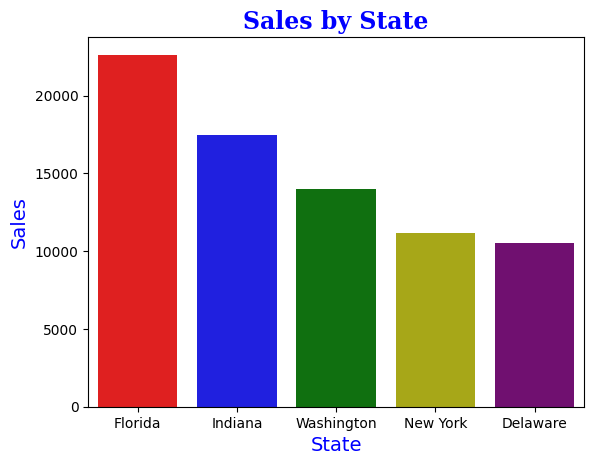

In [15]:
top5 = df.sort_values(by= 'Sales', ascending= False).head()

title_font = {"family": "serif", "color": "Blue", "weight": "bold", "size": 17}
label_font = {"family": "sans-serif", "color": "Blue", "size": 14}
color = ['r', 'b', 'g', 'y', 'purple']

sns.barplot(x= 'State', y= 'Sales', data= top5, palette= color, hue= 'State')
plt.title("Sales by State", fontdict= title_font)
plt.xlabel("State", fontdict= label_font)
plt.ylabel("Sales", fontdict= label_font)
plt.show()

<Axes: xlabel='State', ylabel='Sales'>

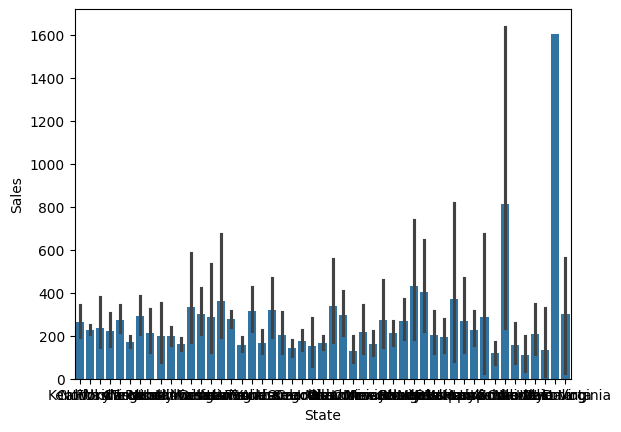

In [16]:
sns.barplot(x= df['State'], y= df['Sales'])

In [17]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [20]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
lower_limit= Q1-1.5*IQR
upper_limit= Q3-1.5*IQR
outiers = [(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit) ]
print(outiers)

[0       True
1       True
2       True
3       True
4       True
        ... 
9989    True
9990    True
9991    True
9992    True
9993    True
Name: Sales, Length: 9977, dtype: bool]


City
New York City    256319.041
Los Angeles      175831.901
Seattle          119460.282
San Francisco    112577.172
Philadelphia     109061.461
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 531, dtype: float64


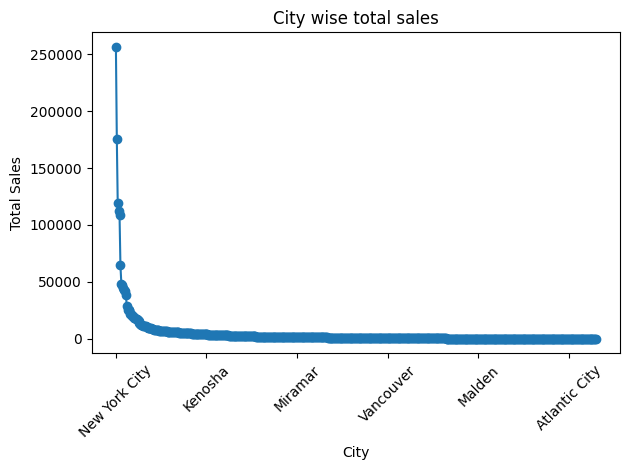

In [21]:
cites_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(cites_sales)


plt.Figure()
cites_sales.plot(kind='line', marker='o')
plt.title("City wise total sales")


plt.xlabel("City")
plt.ylabel("Total Sales")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


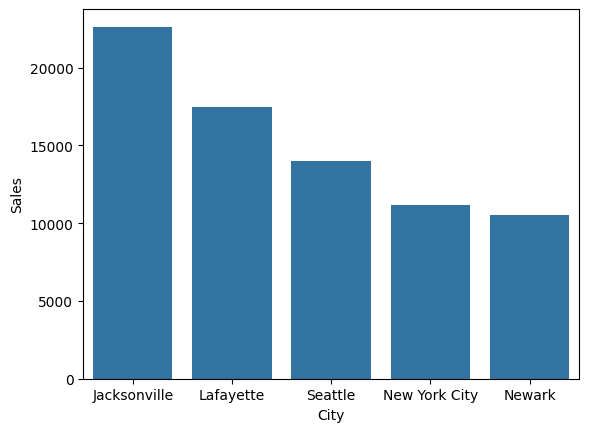

In [22]:
top5 = df.sort_values(by= 'Sales', ascending= False).head()
sns.barplot(x= 'City', y= 'Sales', data= top5)
plt.show()

In [23]:
print(top5.values)

[['Standard Class' 'Home Office' 'United States' 'Jacksonville' 'Florida'
  32216 'South' 'Technology' 'Machines' 22638.48 6 0.5 -1811.0784]
 ['Standard Class' 'Corporate' 'United States' 'Lafayette' 'Indiana'
  47905 'Central' 'Technology' 'Copiers' 17499.95 5 0.0 8399.976]
 ['First Class' 'Consumer' 'United States' 'Seattle' 'Washington' 98115
  'West' 'Technology' 'Copiers' 13999.96 4 0.0 6719.9808]
 ['First Class' 'Home Office' 'United States' 'New York City' 'New York'
  10024 'East' 'Technology' 'Copiers' 11199.968 4 0.2 3919.9888]
 ['Standard Class' 'Consumer' 'United States' 'Newark' 'Delaware' 19711
  'East' 'Technology' 'Copiers' 10499.97 3 0.0 5039.9856]]


In [24]:
df.shape

(9977, 13)

In [25]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64


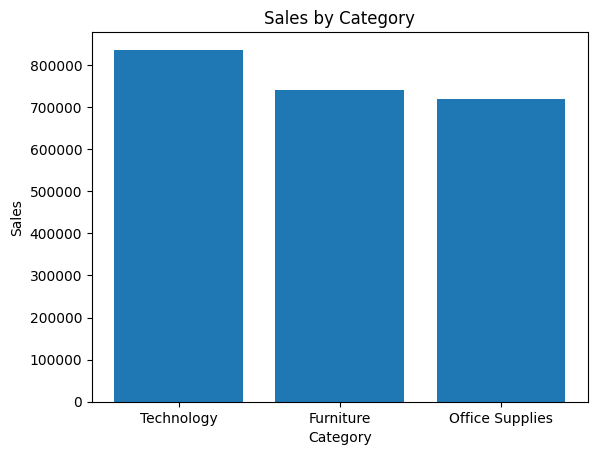

In [26]:

plt.figure()
plt.bar(category_sales.index, category_sales.values)

plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")

plt.show()


In [27]:
pip install dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import os
from dotenv import load_dotenv

def load_api_key(key_name):
    try:
        key = os.getenv(key_name)
        
        if key:
            print(f"{key_name} loaded successfukly!")
        
        else:
            print("Please check your .env file!")
    except Exception as error:
        print(f"Unexpected error occurred while loading {key_name}: {error}")

In [29]:
cites_category_sales = df.groupby(['City', 'Category'])['Sales'].sum().reset_index()
print(cites_category_sales.head())


       City         Category     Sales
0  Aberdeen  Office Supplies    25.500
1   Abilene  Office Supplies     1.392
2     Akron        Furniture   433.596
3     Akron  Office Supplies  1113.388
4     Akron       Technology  1183.002


In [30]:
pivot_tabel= cites_category_sales.pivot(index='City',columns='Category',values='Sales')
print(pivot_tabel.head())

Category     Furniture  Office Supplies  Technology
City                                               
Aberdeen           NaN           25.500         NaN
Abilene            NaN            1.392         NaN
Akron          433.596         1113.388    1183.002
Albuquerque        NaN          943.122    1277.038
Alexandria     267.460         4879.790     372.320
